## Apprentissage semi-supervisée

* Importer les librairies.

In [2]:
import numpy
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.datasets import make_blobs
numpy.random.seed(10)

* Générer des données étiquetées et non-étiquetées.

In [3]:
X, y = make_blobs(n_samples=1000, cluster_std=2)
x_min, x_max = X[:,0].min()-2, X[:,0].max()+2
y_min, y_max = X[:,1].min()-2, X[:,1].max()+2

X_train = X[:500]
y_train = y[:500]

# La majorité des données est non-étiquetées
y_train[numpy.random.choice(500, size=497, replace=False)] = -1

# Ajouter du bruit
X_train[y_train != -1] += 2

X_test = X[500:]
y_test = y[500:]

* Afficher Les données.

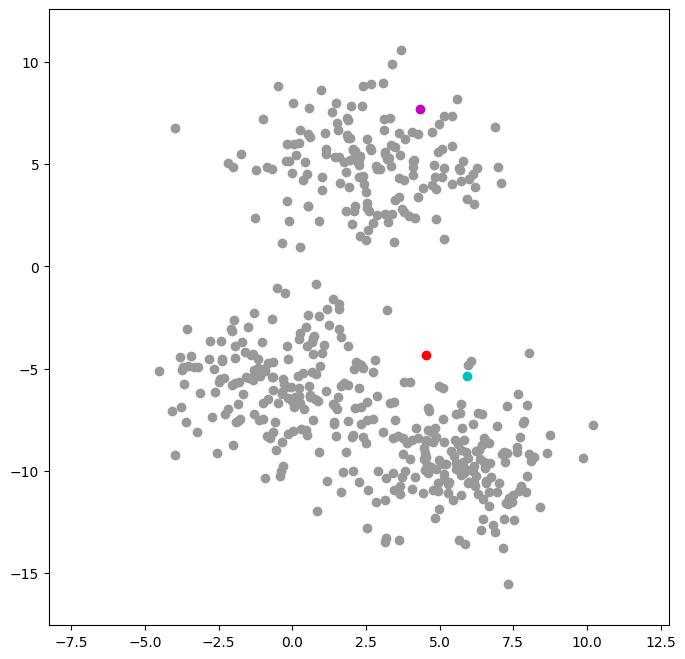

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='0.6')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='c')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='m')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='r')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

* Apprentissage semi-supervisé et prédiction avec l'algorithme Label Propagation

In [5]:
print("Label Propagation (sklearn): ")
#%timeit LabelPropagation().fit(X_train, y_train)
label_prop_model = LabelPropagation()
label_prop_model.fit(X_train[y_train != -1], y_train[y_train != -1])
y_pred = label_prop_model.predict(X_train)


Label Propagation (sklearn): 


c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


* Afficher et analyser le résultat de la prédiction.

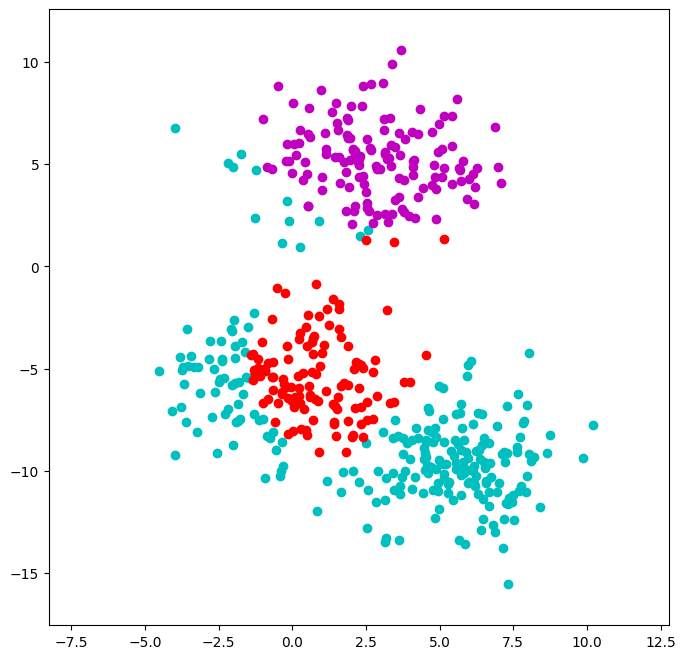

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train[y_pred == 0, 0], X_train[y_pred == 0, 1], color='c')
plt.scatter(X_train[y_pred == 1, 0], X_train[y_pred == 1, 1], color='m')
plt.scatter(X_train[y_pred == 2, 0], X_train[y_pred == 2, 1], color='r')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

* Modifier les paramètres de l'algorithme afin d'améliorer la prédiction.

Label Propagation (sklearn): 


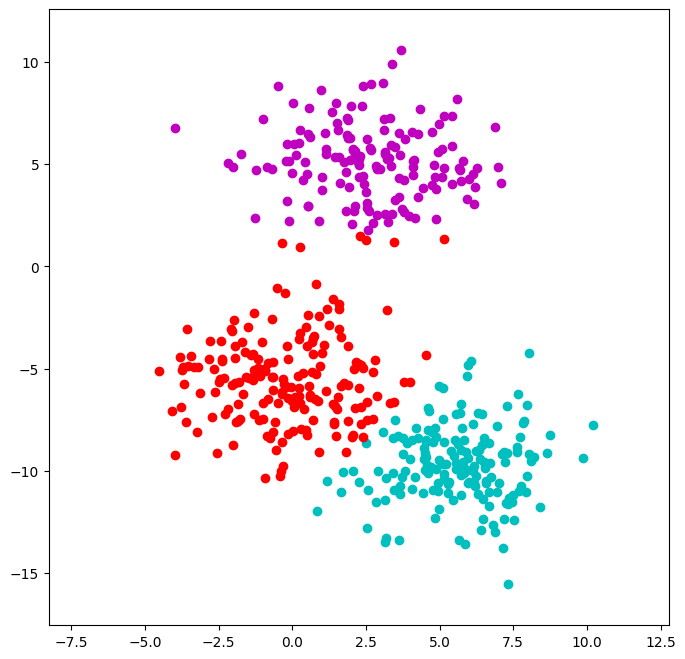

In [7]:
print("Label Propagation (sklearn): ")
#%timeit LabelPropagation().fit(X_train, y_train)
label_prop_model = LabelPropagation(kernel='rbf', gamma=0.1)
label_prop_model.fit(X_train[y_train != -1], y_train[y_train != -1])
y_pred = label_prop_model.predict(X_train)

plt.figure(figsize=(8, 8))
plt.scatter(X_train[y_pred == 0, 0], X_train[y_pred == 0, 1], color='c')
plt.scatter(X_train[y_pred == 1, 0], X_train[y_pred == 1, 1], color='m')
plt.scatter(X_train[y_pred == 2, 0], X_train[y_pred == 2, 1], color='r')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

**Exercice 1**

1. Appliquer de la même manière l'algorithme d'apprentissage semi-supervisé `Label Propagation` sur le jeu de données digits.

2. Appliquer aussi l'algorithme `Label Spreading` sur le même jeu de données

3. Comparer le résultat avec un algorithme d'apprentissage supervisé.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digits = load_digits()
X_digits, y_digits = digits.data, digits.target


X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.5, random_state=42)


y_train_digits_unlabeled = y_train_digits.copy()
y_train_digits_unlabeled[numpy.random.choice(len(y_train_digits), size=int(len(y_train_digits) * 0.9), replace=False)] = -1
print(y_train_digits_unlabeled[5:100])

label_prop_digits = LabelPropagation()
label_prop_digits.fit(X_train_digits, y_train_digits_unlabeled)
y_pred_digits = label_prop_digits.predict(X_test_digits)


accuracy = numpy.mean(y_pred_digits == y_test_digits)
print(f"Accuracy of Label Propagation on digits dataset: {accuracy:.2f}")

[6 5 6 5 6 2 6 8 0 2 3 9 7 5 1 1 7 1 9 6 9 8 5 0 3 2 3 7 7 0 7 5 1 1 1 4 6
 1 0 4 3 5 9 7 7 0 7 0 6 2 9 6 3 3 7 6 9 5 4 2 7 4 9 4 0 9 2 7 4 5 3 3 4 9
 0 8 6 4 4 0 2 3 9 3 3 3 4 8 5 7 4 0 4 9 5]
[-1 -1 -1  5 -1 -1  6 -1  0 -1  3  9 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  9 -1  7  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Accuracy of Label Propagation on digits dataset: 0.09


c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


In [19]:
# Apply Label Spreading
label_spread_digits = LabelSpreading()
label_spread_digits.fit(X_train_digits, y_train_digits_unlabeled)
y_pred_spread_digits = label_spread_digits.predict(X_test_digits)

# Evaluate the performance
accuracy_spread = numpy.mean(y_pred_spread_digits == y_test_digits)
print(f"Accuracy of Label Spreading on digits dataset: {accuracy_spread:.2f}")

Accuracy of Label Spreading on digits dataset: 0.09


c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_digits, y_train_digits)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_digits)

# Evaluate the performance
accuracy_rf = accuracy_score(y_test_digits, y_pred_rf)
print(f"Accuracy of RandomForestClassifier on digits dataset: {accuracy_rf:.2f}")

Accuracy of RandomForestClassifier on digits dataset: 0.96


### Interprétation des résultats

On peut observer que les 2 algorithmes n'ont pas donné de bons résultats en apprentissage semi-supervisé. Les résultats sont meilleurs en apprentissage supervisé. Cela peut être dû au choix des étiquettes de base

## Apprentissage en ligne

On s'intéresse ici à l'apprentissage en ligne par descente de gradient stochastique. En particulier on s'intéresse à la  classification et à la régression en ligne utlisant les fonctions `SGDClassifier` et `SGDRegressor` de `sklearn`.

**Exercice 2**

1. Importer les modules `SGDClassifier` et `SGDRegressor` et les jeux de données `iris` pour la classification et `boston` pour la régression.

2. Diviser les données  en données d'apprentissage et données test. 80% des données est utilisé pour l'apprentissage et les 20% restant pour le test.

3. Créer les modèles `SGDClassifier` avec les fonctions de perte hinge et logistqiue et `SGDRegressor`avec les fonctions de perte moindres carrés et huber.

4. Normaliser les données utilisant la fonction `StandardScaler()`.

5. Apprendre les deux classifieurs et comparer leurs performances sur les données test. Analyser les résultats.

6. Apprendre les deux régresseurs et comparer leurs performances sur les données test. Analyser les résultats.

7. Apprendre un SVM et un SGDClassifier (hinge loss) sur le jeu de données `fetch_covtype` ou  `fetch_20newsgroups`. Utiliser 70% des données pour l'apprentissage et le reste pour la phase de test. Comparer les performances et les temps de calcul des deux classifieurs.

In [ ]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing #utilisation de california housing au lieu de boston
housing = fetch_california_housing()
# Charger les jeux de données
iris = load_iris()


In [12]:
from sklearn.model_selection import train_test_split

# Diviser les données iris
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

# Diviser les données boston
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42)

In [13]:
# Create SGDClassifier models
sgd_clf_hinge = SGDClassifier(loss='hinge', random_state=42)
sgd_clf_log = SGDClassifier(loss='log_loss', random_state=42)

# Create SGDRegressor models
sgd_reg_squared = SGDRegressor(loss='squared_error', random_state=42)
sgd_reg_huber = SGDRegressor(loss='huber', random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_iris_scaled = scaler.fit_transform(X_train_iris)
X_test_iris_scaled = scaler.transform(X_test_iris)


X_train_housing_scaled = scaler.fit_transform(X_train_housing)
X_test_housing_scaled = scaler.transform(X_test_housing)

In [ ]:
# Apprendre les classifieurs
sgd_clf_hinge.fit(X_train_iris_scaled, y_train_iris)
sgd_clf_log.fit(X_train_iris_scaled, y_train_iris)

# Prédire sur les données test
y_pred_hinge = sgd_clf_hinge.predict(X_test_iris_scaled)
y_pred_log = sgd_clf_log.predict(X_test_iris_scaled)


accuracy_hinge = accuracy_score(y_test_iris, y_pred_hinge)
accuracy_log = accuracy_score(y_test_iris, y_pred_log)

print(f"Accuracy of SGDClassifier with hinge loss: {accuracy_hinge:.2f}")
print(f"Accuracy of SGDClassifier with log loss: {accuracy_log:.2f}")

Accuracy of SGDClassifier with hinge loss: 1.00
Accuracy of SGDClassifier with log loss: 0.97


In [ ]:
from sklearn.metrics import mean_squared_error

# Apprendre les régresseurs
sgd_reg_squared.fit(X_train_housing_scaled, y_train_housing)
sgd_reg_huber.fit(X_train_housing_scaled, y_train_housing)

# Prédire sur les données test
y_pred_squared = sgd_reg_squared.predict(X_test_housing_scaled)
y_pred_huber = sgd_reg_huber.predict(X_test_housing_scaled)


mse_squared = mean_squared_error(y_test_housing, y_pred_squared)
mse_huber = mean_squared_error(y_test_housing, y_pred_huber)

print(f"MSE of SGDRegressor with squared loss: {mse_squared:.2f}")
print(f"MSE of SGDRegressor with huber loss: {mse_huber:.2f}")

MSE of SGDRegressor with squared loss: 0.55
MSE of SGDRegressor with huber loss: 0.59


La prochaine cellule nécéssite 7 min d'execution

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import time

# Charger le jeu de données
newsgroups = fetch_20newsgroups(subset='all')
X_newsgroups, y_newsgroups = newsgroups.data, newsgroups.target


vectorizer = TfidfVectorizer()
X_newsgroups_tfidf = vectorizer.fit_transform(X_newsgroups)


X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(
    X_newsgroups_tfidf, y_newsgroups, test_size=0.3, random_state=42)


svm_model = SVC()
start_time = time.time()
svm_model.fit(X_train_news, y_train_news)
svm_train_time = time.time() - start_time


y_pred_svm = svm_model.predict(X_test_news)
svm_accuracy = accuracy_score(y_test_news, y_pred_svm)


sgd_model = SGDClassifier(loss='hinge', random_state=42)
start_time = time.time()
sgd_model.fit(X_train_news, y_train_news)
sgd_train_time = time.time() - start_time

y_pred_sgd = sgd_model.predict(X_test_news)
sgd_accuracy = accuracy_score(y_test_news, y_pred_sgd)


print(f"SVM Accuracy: {svm_accuracy:.2f}, Training Time: {svm_train_time:.2f} seconds")
print(f"SGDClassifier Accuracy: {sgd_accuracy:.2f}, Training Time: {sgd_train_time:.2f} seconds")

SVM Accuracy: 0.90, Training Time: 347.06 seconds
SGDClassifier Accuracy: 0.92, Training Time: 1.96 seconds
